## Backpropagation


**Problem-1:**. In this problem, you will write code to perform backpropagation from scratch. Consider a network with 2 inputs, 1 hidden layer containing 3 units, and a single categorical output.

Imagine the two input nodes are labeled $x_1$ and $x_2$, the three hidden nodes are $a_1$, $a_2$, and $a_3$, and the output node is $\hat{y}$. The edges from the input layer to the hidden layer are labeled $w_{ij}$ for going from input $x_i$ to hidden node $a_j$, and the edges from the hidden layer to the output layer are $v_j$, from hidden unit $a_j$ to $\hat{y}$. There is a bias vector for the hidden layer $\mathbf{b}$ and a bias constant $c$ for the output layer.

Let $a_j = \max(0, z_j)$, where $z_j$ is a weighted sum from the previous layer plus a bias unit. That is,
$$
z_1 = w_{11}x_1 + w_{21}x_2 + b_1 \\
z_2 = w_{12}x_1 + w_{22}x_2 + b_2 \\
z_3 = w_{13}x_1 + w_{23}x_2 + b_3 \\
\Rightarrow z_j = w_{1j}x_1 + w_{2j}x_2 + b_j
$$

For the output, we write

$$ \hat{y} = g(v_1a_1 + v_2a_2 + v_3a_3 + c), $$
where $g$ is the output function (in this case, for binary classification, $g$ is the sigmoid function). Expanding the above expression to show $\hat{y}$ as a function of all of the variables of the graph, we obtain
$$ \hat{y} = g\big[v_1\max(0, w_{11}x_1 + w_{21}x_2 + b_1) \\ + v_2\max(0, w_{12}x_1 + w_{22}x_2 + b_2) \\ + v_3\max(0, w_{13}x_1 + w_{23}x_2 + b_3) + c\large].$$

We can express this succinctly using matrix notation. If

$$ W = \begin{bmatrix}
w_{11} &w_{12} &w_{13}\\
w_{21} &w_{22} &w_{23}\\
\end{bmatrix}, \hspace{.5cm} \mathbf{x} = \begin{bmatrix} x_1 \\x_2 \end{bmatrix}, \hspace{.5cm} \mathbf{b} = \begin{bmatrix} b_1 \\b_2 \\b_3\end{bmatrix}, \hspace{.5cm} \mathbf{a} = \begin{bmatrix} a_1 \\a_2 \\a_3\end{bmatrix}, \hspace{.5cm} \text{and} \hspace{.5cm} \mathbf{v} = \begin{bmatrix} v_1 \\v_2 \\v_3\end{bmatrix},$$

then
$$
z_j = W^{\text{T}}\mathbf{x} + \mathbf{b}, \hspace{.5cm} a_j = \max(0, z_j), \hspace{.5cm} \text{and} \hspace{.5cm} \hat{y} = g(\mathbf{v}^{\text{T}}\cdot\mathbf{a} + c).
$$

(A) Derive expressions of the gradient of the loss function with respect to each of the model parameters.

(B) Write a function `grad_f(...)` that takes in a weights vector and returns the gradient of the loss at that location. You will also need to write a number of helper functions.

(C) Generate a synthetic dataset resembling an XOR pattern. This has been done for you.

(D) Fit the network with gradient descent. Keep track of the total loss at each iteration. Create a plot of the loss over training iterations.

(E) Repeat (D) but using momentum. Compare and contrast the results.

(F) Plot a visualization of the final decision boundary, and overlay the decision boundary over the XOR dataset you created in (C).

`Below we provide some starter code to get you started`

**YOUR ANSWER FOR (A) HERE**:

### Gradient with Respect to \( $\hat{y}$ \) is the derivative of the BCE function:
$$
\frac{\partial L}{\partial \hat{y}} = - \frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}}
$$

### Gradient with Respect to \( $Z_2$ \):
$$
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial Z_2}
$$
Since \( $\hat{y}$ = $\sigma(Z_2)$ \), the derivative of the sigmoid function is:
$$
\frac{\partial \hat{y}}{\partial Z_2} = \hat{y} (1 - \hat{y})
$$
Thus:
$$
\frac{\partial L}{\partial Z_2} = \left( - \frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y})
$$

### Gradient with Respect to \( V \):
$$
\frac{\partial L}{\partial V} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial V}
$$
Since \( $Z_2$ = $V^T A_1$ + C \), we have:
$$
\frac{\partial Z_2}{\partial V} = A_1
$$
Thus:
$$
\frac{\partial L}{\partial V} = A_1 \cdot \frac{\partial L}{\partial Z_2}^T 
$$

### Gradient with Respect to \( C \):
$$
\frac{\partial L}{\partial C} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial C}
$$
Since \( C \) is added element-wise:
$$
\frac{\partial Z_2}{\partial C} = 1
$$
Thus:
$$
\frac{\partial L}{\partial C} = \sum \frac{\partial L}{\partial Z_2}
$$

### Gradient with Respect to \( $A_1$ \):
$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial A_1}
$$
Since \( $Z_2 = V^T A_1$ + C \):
$$
\frac{\partial Z_2}{\partial A_1} = V
$$
Thus:
$$
\frac{\partial L}{\partial A_1} = V \cdot \frac{\partial L}{\partial Z_2}
$$

### Gradient with Respect to \( $Z_1$ \):
$$
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1}
$$
Since \( $A_1 = \text{ReLU}(Z_1)$ \), the derivative of ReLU is:
$$
\frac{\partial A_1}{\partial Z_1} = \mathbb{1}_{Z_1 > 0}
$$
Thus:
$$
\frac{\partial L}{\partial Z_1} = (V \cdot \frac{\partial L}{\partial Z_2}) \cdot \mathbb{1}_{Z_1 > 0}
$$

### Gradient with Respect to \( W \):
$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W}
$$
Since \( $Z_1 = W^T$ X + B \):
$$
\frac{\partial Z_1}{\partial W} = X
$$
Thus:
$$
\frac{\partial L}{\partial W} = X \cdot \frac{\partial L}{\partial Z_1}
$$

### Gradient with Respect to \( B \):
$$
\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial B}
$$
Since \( B \) is added element-wise:
$$
\frac{\partial Z_1}{\partial B} = 1
$$
Thus:
$$
\frac{\partial L}{\partial B} = \sum \frac{\partial L}{\partial Z_1}
$$



In [78]:
# Code for (B) here
import numpy as np
np.random.seed(123456)

W_init = 0.2*np.random.rand(2,3)-0.1
b_init = 0.2*np.random.rand(1,3)-0.1
v_init = 0.2*np.random.rand(3,1)-0.1
c_init = 0.2*np.random.rand()-0.1

params_init = [W_init, b_init, v_init, c_init]

print(f"W is {W_init}\nb is {b_init}\nv is {v_init}\nc is {c_init}")

W is [[-0.07460603  0.09334357 -0.0479048 ]
 [ 0.0794473  -0.02465006 -0.03275565]]
b is [[-0.00972471  0.06805102 -0.07537957]]
v is [[ 0.00860524]
 [-0.02539755]
 [-0.01040064]]
c is -0.07411186405649742


In [79]:
#Part B continued

def relu(z):
    return np.maximum(0, z)
    
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    sig = sigmoid(z)
    return np.multiply(sig, (1 - sig))  # Element-wise multiplication

def relu_prime(z):
    return np.where(z > 0, 1, 0)

def Z(W,X,B):
     """
     Linear transformation.
     W = weights, X = input array, B = bias weights
     """
     return np.dot(X, W) + B

def loss(y, y_hat): #Binary cross entropy
    """Compute loss for a single example"""
    epsilon = 1e-12  # To prevent log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    #return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return -np.mean(np.multiply(y, np.log(y_hat)) + np.multiply((1 - y), np.log(1 - y_hat)))

def loss_derivative(y, y_hat): 
    """Derivative of BCE with respect to Y_hat"""
    epsilon = 1e-9 # Avoid division by zero
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return - (y/ y_hat) + ((1 - y) / (1 - y_hat))

def yhat(X, params):
    """Compute yhat given input data and model specification"""
    """X = input vector X"""
    W, B, V, C = params
    print(f'Wshape: {W.shape}, Bshape: {B.shape}')
    # Forward pass
    Z1 = Z(W, X, B)  # Linear transformation
    A = relu(Z1)  # Activation (ReLU)
    Z2 = Z(V, A, C)  # Linear transformation
    return sigmoid(Z2)  # Activation (Sigmoid) = yhat
    
def grad_f(params, X, y):
    """Compute gradients and output them in order of the parameters (W,B,V,C)"""
    W, B, V, C = params
    
    # Forward pass
    #Input X of (500, 2)
    Z1 = Z(W, X, B)  # (500, 3)
    A = relu(Z1)  # (500, 3)
    Z2 = Z(V, A, C)  # (500, 1)
    y_hat = sigmoid(Z2)  # (500, 1) 
    
    # Compute loss derivative
    dL_dy_hat = loss_derivative(y, y_hat) # (500, 1)
    
    # Backprop through the sigmoid activation
    dy_hat_dZ2 = sigmoid_prime(Z2)  
    dL_dZ2 = np.multiply(dL_dy_hat, dy_hat_dZ2)  # Chain rule
    
    # Backprop through the linear transformation Z2
    dL_dV = np.dot(A.T, dL_dZ2)  
    dL_dC = dL_dC = np.sum(dL_dZ2, axis=0).item() #Getting a scalar

    # Backprop to hidden layer
    dL_dA = np.dot(dL_dZ2, V.T)  # Shape: (batch_size, hidden_size)
    dA_dZ1 = relu_prime(Z1)  
    dL_dZ1 = np.multiply(dL_dA, dA_dZ1) 
    
    # Backprop through the linear transformation Z1
    dL_dW = np.dot(X.T, dL_dZ1)  
    dL_dB = np.asmatrix(np.sum(dL_dZ1, axis=0)).reshape(1, -1)

    gradients = [dL_dW, dL_dB, dL_dV, dL_dC] # Return gradients in the same order as parameters
    return gradients, y_hat


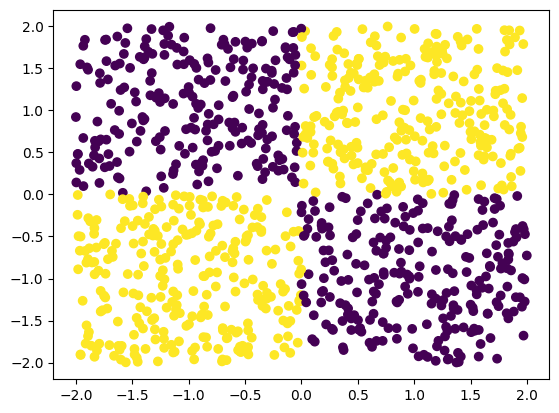

In [80]:
# Code for (C) here
import matplotlib.pyplot as plt
np.random.seed(12345)

Xs = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000, 1))
Ys = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000, 1))
Zs = np.logical_xor(Xs<0, Ys>0).reshape((1000, 1))

plt.scatter(Xs, Ys, c=Zs)
plt.show()

In [81]:
# Your code for (D) here

def gradient_descent(x, y, params, iterations=1000, lr=0.01):
    loss_history = []
    params_history = []
    
    for i in range(iterations):

        # Compute gradients and y_hat
        grads, y_hat = grad_f(params, x, y)
        
        # Update parameters directly using the learning rate
        params = [p - lr * g for p, g in zip(params, grads)]
        
        # Compute loss
        current_loss = loss(y, y_hat)
        loss_history.append(current_loss)
        params_history.append(params)
            
    return params_history, loss_history


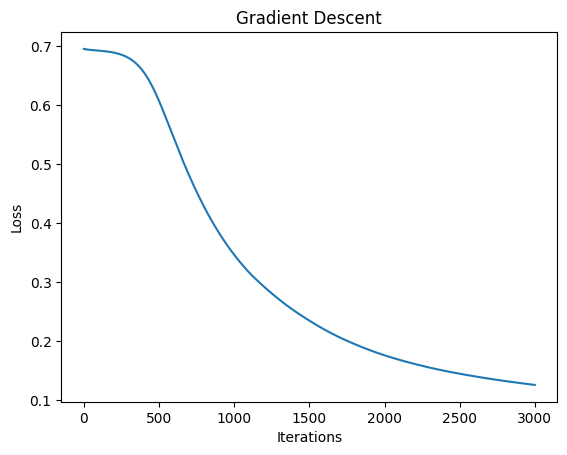

In [82]:
xs = np.random.uniform(low=-2, high=2, size=1000).reshape((500,2))
ys = np.zeros(500)
ys[np.logical_and(xs[:,0]>0, xs[:,1]>0)]=1
ys[np.logical_and(xs[:,0]<0, xs[:,1]<0)]=1

xs = np.asmatrix(xs) 
ys = np.asmatrix(ys).reshape((500,1))

xs = np.asmatrix(xs) 
ys = np.asmatrix(ys).reshape((500,1))


trajectories_standard, losses_standard = gradient_descent(xs, ys, params_init,
                                        iterations=3000, lr=1e-4)
plt.plot(losses_standard)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent")
plt.show()

In [ ]:
# Your code for (E) here

def gradient_descent_momentum(x, y, starting_params, iterations, lr, alpha):    
    params = starting_params
    velocity = [np.zeros_like(p) for p in params]  
    loss_history = []
    trajectories_momentum = [] 
    
    for i in range(iterations):
        # Compute gradients
        grads, y_hat = grad_f(params, x, y)
        
        #Convert grads into NP array so the velocity update will work
        grads = [np.array(g) if isinstance(g, np.matrix) else np.array([g]) for g in grads]

        # Update velocity and parameters using momentum
        velocity = [alpha * v + (1 - alpha) * g for v, g in zip(velocity, grads)]
        params = [p - lr * v for p, v in zip(params, velocity)]
        
        # Store momentum trajectory
        trajectories_momentum.append([p.copy() for p in params])

        # Compute loss
        current_loss = loss(y, y_hat)
        loss_history.append(current_loss)
        
    return trajectories_momentum, loss_history

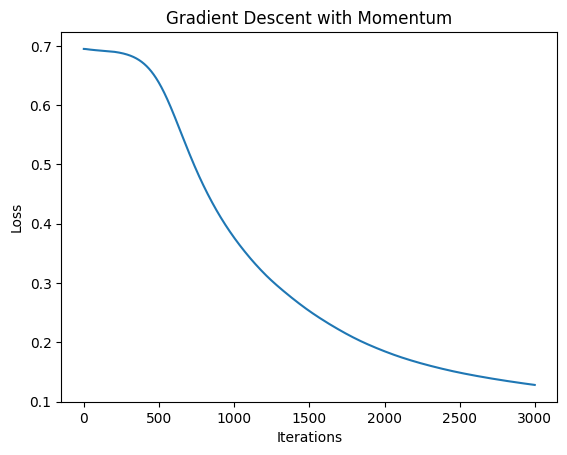

In [84]:
trajectories_momentum, losses_momentum = gradient_descent_momentum(xs, ys, params_init,
                                        iterations=3000, lr=1e-4, alpha=0.95) #I changed the alpha from -0.5 to 0.95 because the loss curves were the same otherwise
plt.plot(losses_momentum)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent with Momentum")
plt.show()

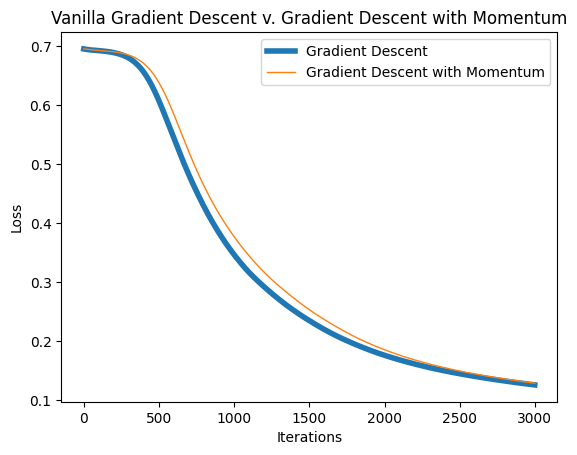

In [85]:
plt.plot(losses_standard, label="Gradient Descent", linewidth=4)
plt.plot(losses_momentum, label="Gradient Descent with Momentum", linewidth=1)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Vanilla Gradient Descent v. Gradient Descent with Momentum")
plt.legend()
plt.show()

At momentum of 0.5 (not shown), the loss curves were equivalent. With a high momentum of 0.95 (shown above), the loss curve declined slightly slower than vanilla gradient descent.

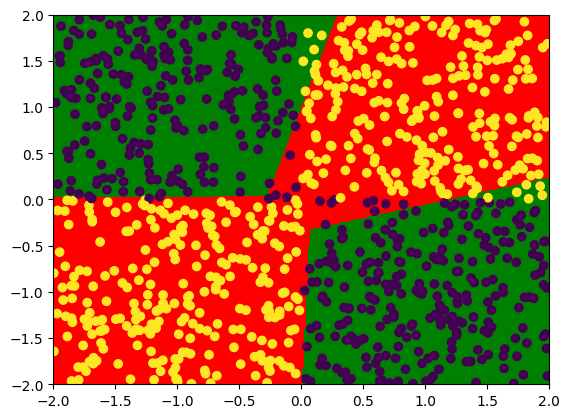

In [86]:
# Your code for (F) here
from matplotlib import colors

Xs = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Ys = np.random.uniform(low=-2.0, high=2.0, size=1000).reshape((1000,1))
Zs = np.logical_xor(Xs<0, Ys>0).reshape((1000,1))

XOR = np.concatenate((Xs, Ys, Zs), axis=1)

x = np.linspace(-2, 2, 250).reshape(250,1)
y = np.linspace(-2, 2, 250).reshape(250,1)
z = np.zeros(250*250).reshape(250,250) #I had to change this to a lower case 'z' because I use upper case Z for the linear transformation function.


W_final, b_final, v_final, c_final = trajectories_momentum[-1]


def ff_nn_relu(X, W, b, v, c):
    """Computes yhat given input data and model specification"""
    Z1 = Z(W, X, b)  #Linear transformation
    A = relu(Z1)  #Relu activation
    Z2 = Z(v, A, c)  #Linear transformation
    y_hat = sigmoid(Z2)  #Sigmoid activation 
    return y_hat  # Predicted probability between 0 and 1

# Given the XOR dataset, compute the decision boundary learned by the network
for countx, i in enumerate(x):
    for county, j in enumerate(y):
        temp = np.array([i[0],j[0]])
        z[countx][county] = 1 if ff_nn_relu(temp, W_final, b_final, v_final, c_final) > 0.5 else 0


X, Y = np.meshgrid(x, y)

cmap = colors.ListedColormap(['green', 'red'])
plt.contourf(X, Y, z, cmap=cmap)
plt.scatter(Xs, Ys, c=Zs)
plt.show()

**Problem-2** One of the challenges in training neural models is when inputs are not on the same scales. Why is this problematic? Consider the expression for the derivative of the loss with respect to a weight for a particular layer.

**YOUR ANSWER HERE**:

If inputs are not on the same scale, the weights that correspond to inputs on a larger scaler scale will be much larger than those of inputs on a smaller scale since during the backpropagation calculation of DL/dW, the last step in the chain rule involves multiplying by the inputs (X). This is seen in the last step of my backpropagation code: 

dL_dW = np.dot(X.T, dL_dZ1)

This means that weights with large scale inputs will get large updates and weights with small inputs will get small updates. If the input scales are vastly different, this can cause large, erratic updates in weights that lead to unstable training and diffuclties in convergence. Essentially, the network is overly sensitive to the large-scale inputs and learns little from the small-scale inputs.`

## Sources I used for this assignment:
- ChatGPT